<a href="https://colab.research.google.com/github/Alend-tech/cyber-attacks-classification-on-enriching-IOT-datasets/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install -q scikit-learn imblearn

In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=ef7d1830b059408902049a7f693700eac5f3fb15c8ec8ea18cc7b7b2b3438ec8
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn import model_selection
from sklearn import tree
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN
%matplotlib inline

In [ ]:
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Training Dataset
data1 = pd.read_csv("/content/drive/MyDrive/veriag/dataset/Bot_iot_DDoS_new.csv")
data2 = pd.read_csv("/content/drive/MyDrive/veriag/dataset/Bot_iot_DoS_new.csv")
data3 = pd.read_csv("/content/drive/MyDrive/veriag/dataset/Bot_iot_scanning.csv")
data4 = pd.read_csv("/content/drive/MyDrive/veriag/dataset/Ton_iot_DDoS_new.csv", index_col=False)
data5 = pd.read_csv("/content/drive/MyDrive/veriag/dataset/Ton_iot_DoS.csv")
data6 = pd.read_csv("/content/drive/MyDrive/veriag/dataset/Ton_iot_scanning_new.csv", index_col=False)
data1.head()


,Unnamed: 0,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Unnamed: 9,...,wifi_dst,Sequence number,Protocol Version,flow_idle_time,flow_active_time,Correlation,RARP,category,Protocol_name,label
0,0,1528095664,0.000000,1112,192.168.100.46,192.168.100.5,3456,80,17,NaN,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,UDP,111
1,1,1528095664,0.000000,1405,192.168.100.55,192.168.100.3,8080,80,6,NaN,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,TCP,112
2,2,1528095664,0.000005,2591,192.168.100.3,192.168.100.55,80,8080,6,NaN,...,0,0,0,5.010000e-06,0.000005,0.0,0,Ddos,TCP,112
3,3,1528095664,0.000000,777,192.168.100.46,192.168.100.5,80,80,17,NaN,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,UDP,111
4,4,1528095664,0.003423,1709,192.168.100.5,192.168.100.46,80,3456,17,NaN,...,0,0,0,3.422976e-03,0.003423,0.0,0,Ddos,UDP,111


In [ ]:
merged = pd.concat([data1, data2,data3,data4,data5,data6])

In [ ]:
merged.columns.str.match("Unnamed" ,"NaN")
cleaned= merged.loc[:,~merged.columns.str.match("Unnamed", "NaN")]
merged.head()

,Unnamed: 0,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Unnamed: 9,...,wifi_dst,Sequence number,Protocol Version,flow_idle_time,flow_active_time,Correlation,RARP,category,Protocol_name,label
0,0,1528095664,0.000000,1112,192.168.100.46,192.168.100.5,3456,80,17,NaN,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,UDP,111.0
1,1,1528095664,0.000000,1405,192.168.100.55,192.168.100.3,8080,80,6,NaN,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,TCP,112.0
2,2,1528095664,0.000005,2591,192.168.100.3,192.168.100.55,80,8080,6,NaN,...,0,0,0,5.010000e-06,0.000005,0.0,0,Ddos,TCP,112.0
3,3,1528095664,0.000000,777,192.168.100.46,192.168.100.5,80,80,17,NaN,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,UDP,111.0
4,4,1528095664,0.003423,1709,192.168.100.5,192.168.100.46,80,3456,17,NaN,...,0,0,0,3.422976e-03,0.003423,0.0,0,Ddos,UDP,111.0


In [ ]:
cleaned['rst_count'].value_counts()

In [ ]:
cleaned['CoAP'].value_counts()

0    52137
Name: CoAP, dtype: int64

In [ ]:
cleaned= merged.dropna(axis=1, how='all')
merged.reset_index(drop=True,inplace=True)
cleaned.head()

,Unnamed: 0,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Duration,...,wifi_dst,Sequence number,Protocol Version,flow_idle_time,flow_active_time,Correlation,RARP,category,Protocol_name,label
0,0,1528095664,0.000000,1112,192.168.100.46,192.168.100.5,3456,80,17,127,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,UDP,111.0
1,1,1528095664,0.000000,1405,192.168.100.55,192.168.100.3,8080,80,6,127,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,TCP,112.0
2,2,1528095664,0.000005,2591,192.168.100.3,192.168.100.55,80,8080,6,127,...,0,0,0,5.010000e-06,0.000005,0.0,0,Ddos,TCP,112.0
3,3,1528095664,0.000000,777,192.168.100.46,192.168.100.5,80,80,17,127,...,0,0,0,1.528096e+09,0.000000,0.0,0,Ddos,UDP,111.0
4,4,1528095664,0.003423,1709,192.168.100.5,192.168.100.46,80,3456,17,127,...,0,0,0,3.422976e-03,0.003423,0.0,0,Ddos,UDP,111.0


In [ ]:
print(cleaned['wifi_src'])

In [ ]:
np.sum(cleaned.isnull().any(axis=1))

30

In [ ]:
cleaned = cleaned.dropna(subset=['label'])

In [ ]:
np.sum(cleaned.isnull().any(axis=1))

0

In [ ]:
cleanedpro=cleaned.loc[:, (cleaned != 0).any(axis=0)]

In [ ]:
cleanedd=cleaned.drop(['N_IN_Conn_P_Src_IP','CoAP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'urg_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count','Wifi_Subtype','DS status','DHCP','ARP','ICMP','fin_flag_number','wifi_src','wifi_dst','Sequence number',	'Protocol Version','Source Port','Destination Port','Protocol Type','Duration'], axis=1)

In [ ]:
cleanedpro=cleanedd.loc[:, (cleanedd != 0).any(axis=0)]

In [ ]:
cleanedpro.to_csv("/content/drive/MyDrive/veriag/combined_file.csv", index=False, header=True)
#csv=combined_file

cleanedpro.head()

,Unnamed: 0,ts,flow_duration,Header_Length,Source IP,Destination IP,src_ip_bytes,dst_ip_bytes,src_pkts,dst_pkts,...,Radius,Covariance,Variance,Weight,flow_idle_time,flow_active_time,Correlation,category,Protocol_name,label
0,0,1528095664,0.000000,1112,192.168.100.46,192.168.100.5,1,1,1,1,...,0.000000,0.0,0.0,0,1.528096e+09,0.000000,0.0,Ddos,UDP,111.0
1,1,1528095664,0.000000,1405,192.168.100.55,192.168.100.3,1,1,1,1,...,146.500000,0.0,0.0,0,1.528096e+09,0.000000,0.0,Ddos,TCP,112.0
2,2,1528095664,0.000005,2591,192.168.100.3,192.168.100.55,1,1,1,1,...,124.403465,0.0,0.0,0,5.010000e-06,0.000005,0.0,Ddos,TCP,112.0
3,3,1528095664,0.000000,777,192.168.100.46,192.168.100.5,2,2,2,2,...,124.403465,0.0,0.0,3,1.528096e+09,0.000000,0.0,Ddos,UDP,111.0
4,4,1528095664,0.003423,1709,192.168.100.5,192.168.100.46,1,1,1,1,...,296.257489,0.0,0.0,4,3.422976e-03,0.003423,0.0,Ddos,UDP,111.0


In [ ]:
cleanedpro.count()

<Axes: ylabel='category'>

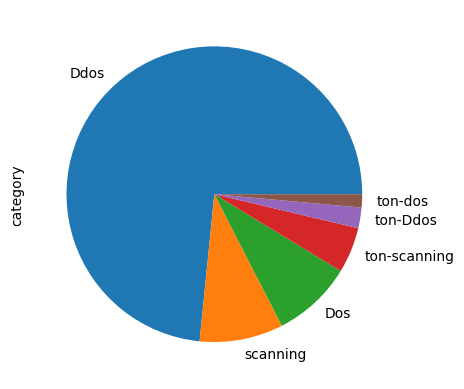

In [ ]:
cleanedpro.category.value_counts().plot(kind='pie')

In [ ]:
cleanedpro['AR_P_Proto_P_Dst_IP'] = cleanedpro['AR_P_Proto_P_Dst_IP'].str.replace('\W','', regex=True)
cleanedpro['AR_P_Proto_P_dport'] = cleanedpro['AR_P_Proto_P_dport'].str.replace("\W", "", regex=True)
cleanedpro['TnP_per_dport'] = cleanedpro['TnP_per_dport'].str.replace('\W', '', regex=True)
cleanedpro['N_IN_Conn_P_Dst_IP'] = cleanedpro['N_IN_Conn_P_Dst_IP'].str.replace('\W', '', regex=True)
#cleanedpro[' TnP_per_Proto'] = cleanedpro[' TnP_per_Proto'].str.replace('\W', '', regex=True)
cleanedpro['AR_P_Proto_P_sport'] = cleanedpro['AR_P_Proto_P_sport'].str.replace('\W', '', regex=True)
cleanedpro.head()


In [ ]:
# Label Encoding the target columns
le = LabelEncoder()
cleanedpro['label'] = le.fit_transform(cleanedpro['label'])
cleanedpro['category'] = le.fit_transform(cleanedpro['category'])
cleanedpro['Protocol_name'] = le.fit_transform(cleanedpro['Protocol_name'])
cleanedpro['Source IP'] = le.fit_transform(cleanedpro['Source IP'])
cleanedpro['Destination IP'] = le.fit_transform(cleanedpro['Destination IP'])
cleanedpro['AR_P_Proto_P_Dst_IP'] = le.fit_transform(cleanedpro['AR_P_Proto_P_Dst_IP'])
cleanedpro['AR_P_Proto_P_SrcIP'] = le.fit_transform(cleanedpro['AR_P_Proto_P_SrcIP'])
cleanedpro['AR_P_Proto_P_sport'] = le.fit_transform(cleanedpro['AR_P_Proto_P_sport'])
cleanedpro['AR_P_Proto_P_dport'] = le.fit_transform(cleanedpro['AR_P_Proto_P_dport'])

cleanedpro.head()

<Axes: ylabel='category'>

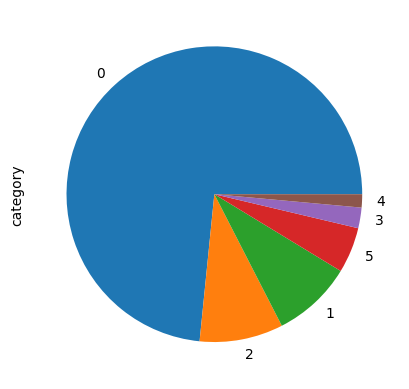

In [ ]:
cleanedpro.category.value_counts().plot(kind='pie')

# Exploratory Data Analysis

In [ ]:
cleanedpro['category'].value_counts()

0    38250
2     4760
1     4568
5     2602
3     1173
4      754
Name: category, dtype: int64

In [ ]:
cleanedpro.count()

Unnamed: 0          52107
ts                  52107
flow_duration       52107
Header_Length       52107
Source IP           52107
                    ...  
flow_active_time    52107
Correlation         52107
category            52107
Protocol_name       52107
label               52107
Length: 67, dtype: int64

In [ ]:
#if an error occur that ndarray does not have an attribute value count() active this code but you should check the size of the data set it changed
#X_train = pd.DataFrame(cleanedpro, columns = cleanedpro.columns)
#X_test = pd.DataFrame(cleanedpro, columns=cleanedpro.columns)

#SEPERATING LABELS
Preparing for data resampling the size

In [ ]:
# Separate class
class_0 = cleanedpro[cleanedpro['category'] == 0]
class_1 = cleanedpro[cleanedpro['category'] == 1]
class_2 = cleanedpro[cleanedpro['category'] == 2]
class_3 = cleanedpro[cleanedpro['category'] == 3]
class_4 = cleanedpro[cleanedpro['category'] == 4]
class_5 = cleanedpro[cleanedpro['category'] == 5]
#class_6 = cleanedpro[cleanedpro['label'] == 6]
#class_7 = cleanedpro[cleanedpro['label'] == 7]
#class_8 = cleanedpro[cleanedpro['label'] == 8]

# print the shape of the class

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
#print('class 6:', class_6.shape)
#print('class 7:', class_7.shape)
#print('class 8:', class_8.shape)


class 0: (38250, 66)
class 1: (4568, 66)
class 2: (4760, 66)
class 3: (1173, 66)
class 4: (754, 66)
class 5: (2602, 66)


#UnderSampling
forthe big values such as 0 and 1

total class of 0: 0    8684
1      10
Name: category, dtype: int64


<Axes: title={'center': 'count (target)'}>

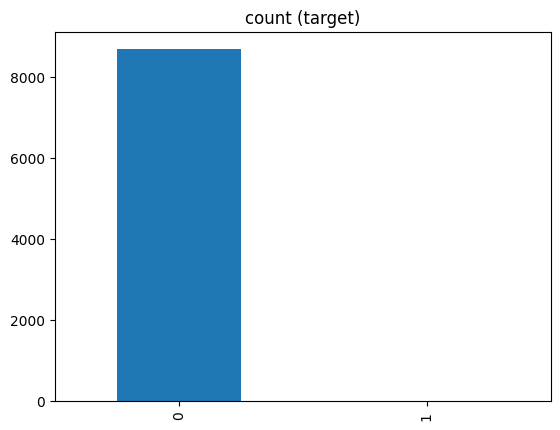

In [ ]:
# undersampling

class_0_under = class_0.sample(8684)
class_1_under = class_1.sample(10)
test_under0 = pd.concat([class_0_under,class_1_under], axis=0)
print("total class of 0:",test_under0['category'].value_counts())# plot the count after under-sampeling
test_under0['category'].value_counts().plot(kind='bar', title='count (target)')


In [ ]:
x,y=test_under0['category'].value_counts()
print(x,y)

8684 10


In [ ]:
class_0_under['category'].value_counts()

0    8684
Name: category, dtype: int64

#OverSampling

total class of 1 and0: 1    8694
2    8684
3    8684
4    8684
5    8684
0    8684
Name: category, dtype: int64


<Axes: title={'center': 'count (target)'}, ylabel='category'>

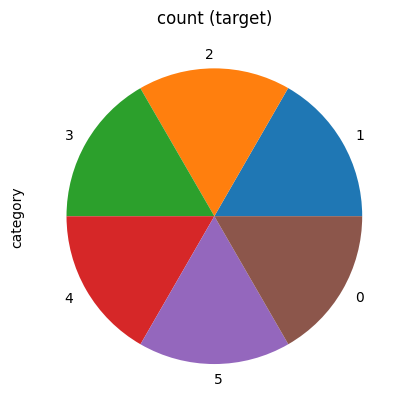

In [ ]:
# oversampling
class_1_under = class_1.sample(x,replace=True)
class_2_under = class_2.sample(x,replace=True)
class_3_under = class_3.sample(x,replace=True)
class_4_under = class_4.sample(x,replace=True)
class_5_under = class_5.sample(x,replace=True)
#class_6_under = class_6.sample(x,replace=True)
#class_7_under = class_7.sample(x,replace=True)
#class_8_under = class_8.sample(x,replace=True)

test_under1 = pd.concat([class_1_under, class_2_under], axis=0)
test_under2 = pd.concat([test_under1, class_3_under], axis=0)
test_under3 = pd.concat([test_under2, class_4_under], axis=0)
test_under4 = pd.concat([test_under3, class_5_under], axis=0)
#test_under5 = pd.concat([test_under4, class_7_under], axis=0)
#test_under6 = pd.concat([test_under5, class_8_under], axis=0)
mydata = pd.concat([test_under4, test_under0], axis=0)
print("total class of 1 and0:",mydata['category'].value_counts())# plot the count after under-sampeling
mydata['category'].value_counts().plot(kind='pie', title='count (target)')

<Axes: ylabel='category'>

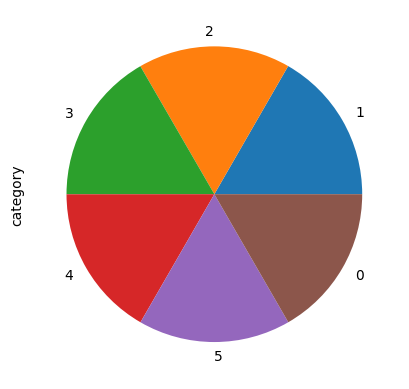

In [ ]:
mydata.category.value_counts().plot(kind='pie')

In [ ]:
mydata.shape

(52114, 67)

In [ ]:
print(mydata)

#DIVIDING X,Y,TEST,TRAIN

In [ ]:
#xdata = mydata[['Max', 'Min','Std','Protocol_name','Tot sum','AVG','Radius','Number','ts','Header_Length','MAC','Tot size']]

In [ ]:
xdata = mydata[['sum_flow_duration','average_flow_duration','std_flow_duration','MQTT','HTTP','TCP','UDP','AR_P_Proto_P_SrcIP','AR_P_Proto_P_sport','AR_P_Proto_P_dport','max_flow_duration','min_flow_duration','urg_count','rst_count','Spkts','Dpkts','Sbytes','Dbytes','psh_flag_number','ack_flag_number','syn_count','fin_count','dst_ip_bytes','src_pkts','dst_pkts','Rate','Srate','Drate','TNP_per_proto_tcp','TNP_per_proto_udp','syn_flag_number','rst_flag_number','src_ip_bytes','IGMP','IPv','LLC','IAT','Magnitue','Covariance','Variance','Weight','flow_idle_time','flow_active_time','Correlation','flow_duration','Header_Length','Tot sum',	'Min',	'Max',	'AVG', 'Std', 'Number',	'MAC','Radius','Protocol_name', 'Source IP','Destination IP']]
#xdata.head()
#xdata=mydata.drop(axis=1, columns=['label'])
#xdata=mydata.drop(axis=1, columns=['Protocol_name'])
#xdata=mydata.drop(axis=1, columns=['category'])

ydata=mydata['category'].values.reshape(-1,1)
xdata

,sum_flow_duration,average_flow_duration,std_flow_duration,MQTT,HTTP,TCP,UDP,AR_P_Proto_P_SrcIP,AR_P_Proto_P_sport,AR_P_Proto_P_dport,...,Min,Max,AVG,Std,Number,MAC,Radius,Protocol_name,Source IP,Destination IP
808,8.862871e+10,1528081264,0.388764,0,0,0,1,9093,48646,51935,...,60,1368,865.222222,394.719810,9,808449,548.949221,2,596,64
1750,7.150000e+11,1528081265,0.844163,0,0,0,1,6827,49009,50887,...,296,1467,949.181818,366.315517,11,808449,484.814156,2,593,65
1632,1.790000e+11,1528081265,0.785916,0,0,0,1,8988,48544,51018,...,60,1502,823.461538,419.783390,13,808449,571.027013,2,596,64
2718,1.110000e+12,1528081266,1.311754,0,1,1,0,8831,50985,49812,...,60,1422,836.631579,410.159560,19,808449,624.572944,1,594,64
2911,1.190000e+12,1528081266,1.405361,0,0,0,1,7432,51887,49597,...,60,1447,857.333333,448.934912,12,808449,632.361935,2,592,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,7.500000e+11,1528081267,1.772304,0,1,1,0,7232,49405,48750,...,60,1458,870.866667,397.458739,15,808449,566.496009,1,592,66
494,2.030000e+11,1528081264,0.238573,0,0,0,1,4894,51628,47715,...,60,1220,829.733333,323.375214,15,808449,422.755146,2,592,66
695,8.557255e+10,1528081264,0.336802,0,0,1,0,9118,47867,52061,...,60,1436,889.187500,354.434271,16,808449,531.965744,1,593,64
1471,6.020000e+11,1528081265,0.710930,0,1,1,0,5256,48562,51197,...,60,1320,729.666667,346.816554,12,808449,472.882887,1,591,67


In [ ]:
ydata

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# Scaling the data
sc = StandardScaler()
xdata = sc.fit_transform(xdata)
print(xdata)

[[-0.38735212  1.00032768 -0.47814502 ...  1.58097627 -0.18715157
   0.72447025]
 [-0.12141012  1.00032768 -0.35641963 ...  1.58097627 -0.19576315
   0.77256413]
 [-0.34898267  1.00032768 -0.37198864 ...  1.58097627 -0.18715157
   0.72447025]
 ...
 [-0.3886497   1.00032768 -0.49203429 ...  0.3405403  -0.19576315
   0.72447025]
 [-0.16938717  1.00032768 -0.39203195 ...  0.3405403  -0.20150421
   0.86875189]
 [-0.19740917  1.00032768 -0.24348967 ...  1.58097627 -0.19863368
   0.82065801]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xdata,ydata,random_state=None,test_size=0.3)
X_train

array([[-0.00550097,  0.99874914,  0.6067849 , ...,  1.58097627,
        -0.19863368,  0.82065801],
       [ 1.6936508 ,  1.00034656,  2.56683543, ...,  1.58097627,
        -0.19863368,  0.82065801],
       [ 0.22037328,  0.99874915,  1.24977565, ...,  1.58097627,
        -0.19863368,  0.82065801],
       ...,
       [-0.41589871,  1.00032768, -0.57541722, ...,  0.3405403 ,
        -0.20150421,  0.86875189],
       [ 2.25409067,  1.00034655,  1.40897322, ...,  0.3405403 ,
        -0.20150421,  0.86875189],
       [-0.42498172, -1.00019177, -0.58205935, ..., -0.89989567,
        -0.4139233 , -0.14121959]])

#Features importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

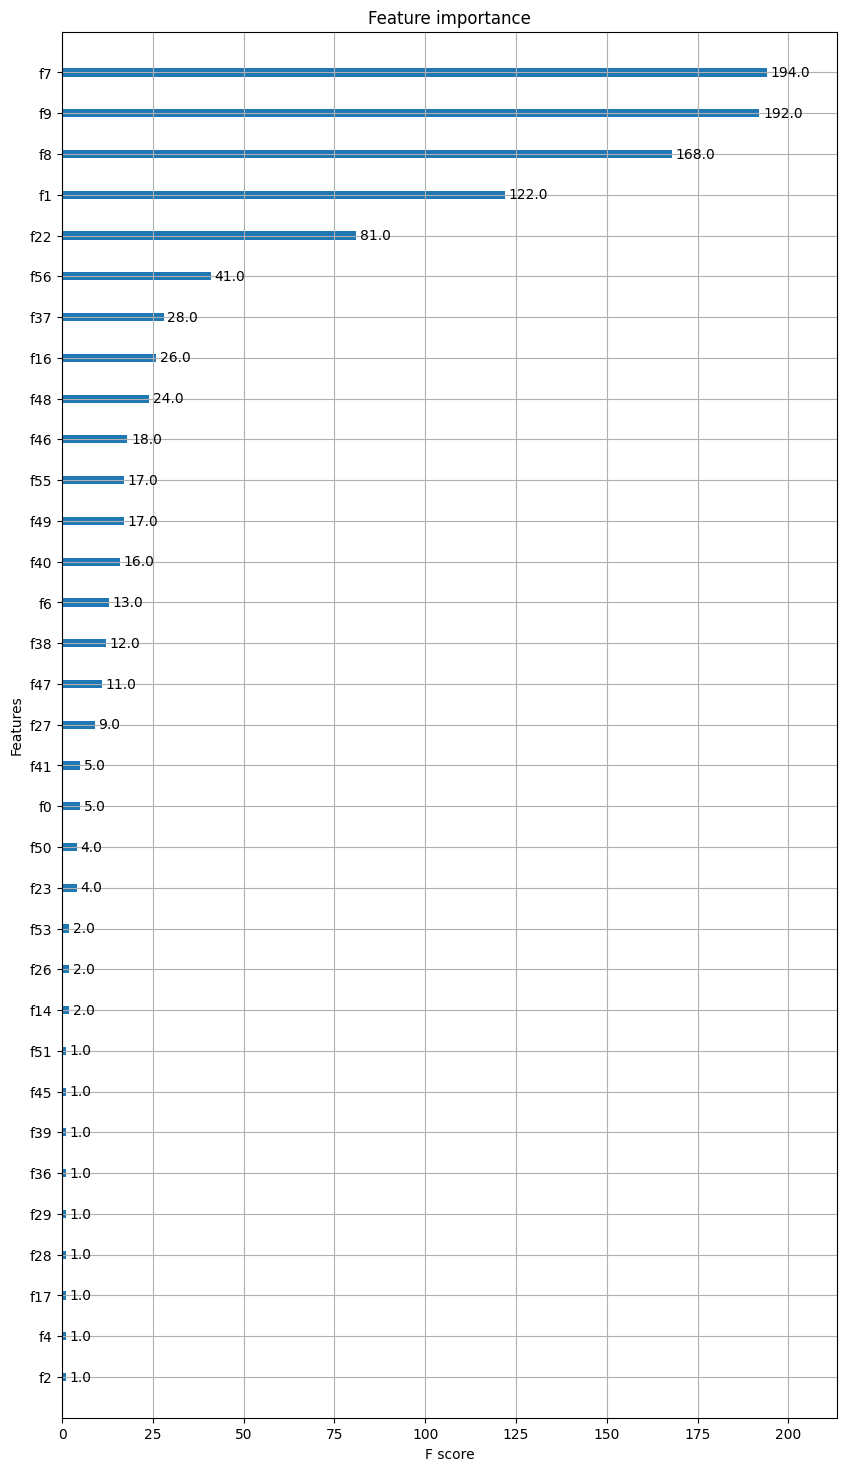

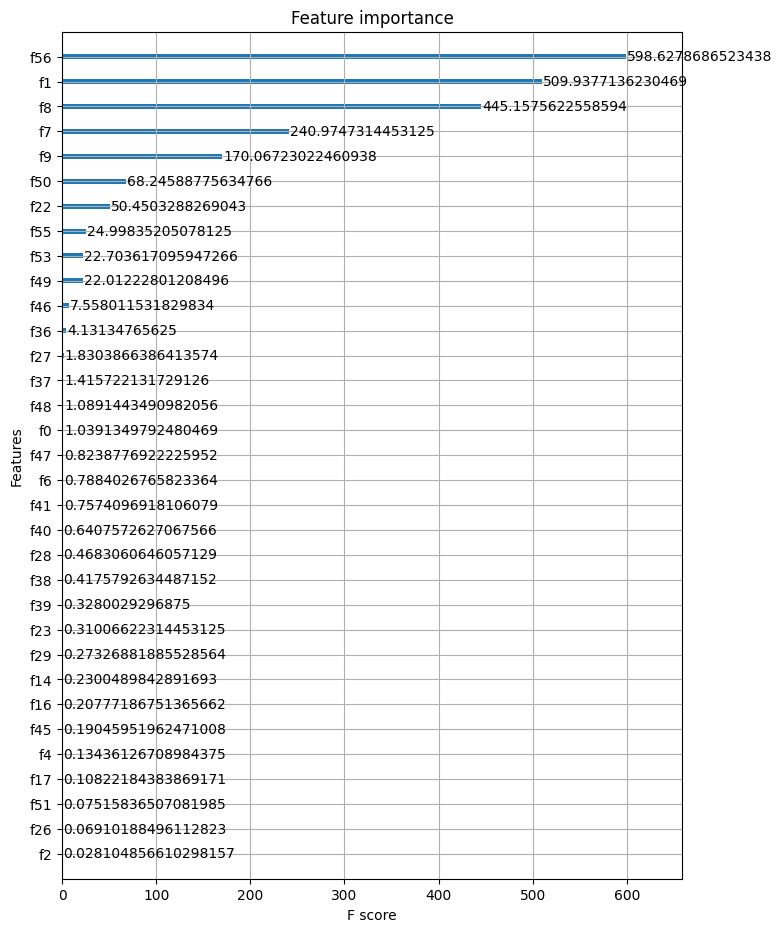

In [ ]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import plot_importance
from matplotlib import pyplot
# load data
# split data into X and y
# fit model no training data
model = XGBClassifier()
model.fit(X_train,y_train)
# plot feature importance
fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, ax=ax,max_num_features=None)
fig,ax2 = plt.subplots(figsize=(8,11))
xgb.plot_importance(model, importance_type='gain', ax=ax2)
#plot_importance(model,)
#pyplot.show()

In [ ]:
xxdata=mydata[['AR_P_Proto_P_sport','AR_P_Proto_P_dport', 'AR_P_Proto_P_SrcIP','average_flow_duration','dst_ip_bytes','Sbytes','UDP','sum_flow_duration', 'Destination IP','flow_idle_time']]

In [ ]:
# Scaling the data
sc = StandardScaler()
xxdata = sc.fit_transform(xdata)
print(xxdata)

[[-0.38735212  1.00032768 -0.47814502 ...  1.58097627 -0.18715157
   0.72447025]
 [-0.12141012  1.00032768 -0.35641963 ...  1.58097627 -0.19576315
   0.77256413]
 [-0.34898267  1.00032768 -0.37198864 ...  1.58097627 -0.18715157
   0.72447025]
 ...
 [-0.3886497   1.00032768 -0.49203429 ...  0.3405403  -0.19576315
   0.72447025]
 [-0.16938717  1.00032768 -0.39203195 ...  0.3405403  -0.20150421
   0.86875189]
 [-0.19740917  1.00032768 -0.24348967 ...  1.58097627 -0.19863368
   0.82065801]]


In [ ]:
XX_train, XX_test, yy_train, yy_test = train_test_split(xxdata,ydata,random_state=None,test_size=0.3)
XX_train

array([[-4.24981717e-01, -1.00019177e+00, -5.82059351e-01, ...,
        -8.99895665e-01,  1.34571053e+00, -1.00690943e+00],
       [ 3.56237489e-01,  1.00032768e+00,  3.10110431e-04, ...,
         3.40540304e-01, -2.01504210e-01,  8.68751888e-01],
       [-3.04402231e-01,  9.98749139e-01,  7.03563291e-02, ...,
         3.40540304e-01, -1.98633682e-01,  8.20658008e-01],
       ...,
       [-4.24981717e-01, -1.00019177e+00, -5.82059351e-01, ...,
        -8.99895665e-01,  2.06334259e+00, -4.77876754e-01],
       [ 3.47745976e-01,  9.98749152e-01,  1.61357647e+00, ...,
         3.40540304e-01, -2.01504210e-01,  8.68751888e-01],
       [-4.24981717e-01, -1.00019177e+00, -5.82059351e-01, ...,
        -8.99895665e-01,  1.95139199e+00, -2.20925644e+00]])

#Modeling /Train-Test-Evaluate


In [ ]:

#Random Forest
class RandomForest:
    def __init__(self,max_depth):
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)



    def fit(self,XX_train,yy_train):
        self.rfc_category.fit(XX_train,yy_train)
    def predict(self,XX_test):
        predict_attack = self.rfc_category.predict(XX_test)



        return pd.DataFrame({'attack':predict_attack})
rf = RandomForest(max_depth=3)
rf.fit(XX_train,yy_train)

predictions_rfc = rf.predict(XX_test)
print(classification_report(yy_test,predictions_rfc, digits=6))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      2610
           1   1.000000  1.000000  1.000000      2626
           2   1.000000  1.000000  1.000000      2613
           3   0.998065  0.980608  0.989260      2630
           4   0.980638  1.000000  0.990224      2583
           5   1.000000  0.998057  0.999027      2573

    accuracy                       0.996418     15635
   macro avg   0.996450  0.996444  0.996419     15635
weighted avg   0.996476  0.996418  0.996418     15635



In [ ]:
%%time
#Descision Tree
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier (max_depth=8, criterion="gini", min_samples_split=2, splitter="random", min_samples_leaf=2).fit(XX_train, yy_train)
dtree_predictions = dtree_model.predict(XX_test)

# creating a classification_report

print(classification_report(yy_test,dtree_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      2610
           1   1.000000  1.000000  1.000000      2626
           2   1.000000  1.000000  1.000000      2613
           3   0.993325  0.961977  0.977400      2630
           4   0.962491  0.993419  0.977710      2583
           5   1.000000  1.000000  1.000000      2573

    accuracy                       0.992517     15635
   macro avg   0.992636  0.992566  0.992518     15635
weighted avg   0.992680  0.992517  0.992516     15635

CPU times: user 158 ms, sys: 2.65 ms, total: 161 ms
Wall time: 283 ms


In [ ]:
np.unique(predictions_rfc)

array([0, 1, 2, 3, 4, 5])

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [ ]:
%%time
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(C = 1.0).fit(XX_train, yy_train.ravel())
svm_predictions = svm_model_linear.predict(XX_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(XX_test, yy_test.ravel())

# creating a classification_report
print(classification_report(yy_test.ravel(),svm_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.996944  0.989011  0.992962      2639
           1   0.998864  1.000000  0.999432      2638
           2   0.989065  0.995824  0.992433      2634
           3   0.943598  0.957093  0.950297      2587
           4   0.949323  0.957098  0.953195      2564
           5   1.000000  0.977458  0.988601      2573

    accuracy                       0.979597     15635
   macro avg   0.979632  0.979414  0.979487     15635
weighted avg   0.979807  0.979597  0.979666     15635

CPU times: user 43.6 s, sys: 282 ms, total: 43.9 s
Wall time: 43.7 s


In [ ]:
class GradientBoost:
    def __init__(self, learning_rate, min_samples_split):
        self.xgb_category = XGBClassifier(learning_rate=learning_rate, min_samples_split= min_samples_split)

    def fit(self,XX_train,yy_train):
        self.xgb_category.fit(XX_train,yy_train)
    def predict(self,XX_test):
          predict_attack = self.xgb_category.predict(XX_test)
          return pd.DataFrame({'attack':predict_attack})
xgb = GradientBoost(learning_rate=0.1, min_samples_split= 3)
xgb.fit(XX_train,yy_train)
predictions_xgb = xgb.predict(XX_test)
print(classification_report(yy_test,predictions_xgb, digits=5))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      2639
           1    1.00000   1.00000   1.00000      2638
           2    1.00000   1.00000   1.00000      2634
           3    1.00000   1.00000   1.00000      2587
           4    1.00000   1.00000   1.00000      2564
           5    1.00000   1.00000   1.00000      2573

    accuracy                        1.00000     15635
   macro avg    1.00000   1.00000   1.00000     15635
weighted avg    1.00000   1.00000   1.00000     15635



In [ ]:
%time
# importing necessary libraries
from sklearn import datasets


# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(XX_train, yy_train)

# accuracy on X_test
accuracy = knn.score(XX_test, yy_test)
print (accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(XX_test)
from sklearn.metrics import precision_score
print(classification_report(yy_test,knn_predictions, digits=5))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9884234090182283
              precision    recall  f1-score   support

           0    0.99613   0.97461   0.98525      2639
           1    0.98389   0.99545   0.98964      2638
           2    0.97519   0.98481   0.97998      2634
           3    0.98432   0.99459   0.98943      2587
           4    0.99727   0.99805   0.99766      2564
           5    0.99450   0.98329   0.98886      2573

    accuracy                        0.98842     15635
   macro avg    0.98855   0.98847   0.98847     15635
weighted avg    0.98850   0.98842   0.98842     15635



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(XX_train, yy_train)
xxx= clf.predict(XX_test)
clf.predict_proba(XX_test)
clf.score(XX_test,yy_test)
# creating a classification_report
print(classification_report(yy_test.ravel(),xxx, digits=6))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0   1.000000  0.999242  0.999621      2639
           1   1.000000  1.000000  1.000000      2638
           2   0.999620  1.000000  0.999810      2634
           3   0.948919  0.933514  0.941154      2587
           4   0.934175  0.952028  0.943017      2564
           5   0.999610  0.997279  0.998444      2573

    accuracy                       0.980556     15635
   macro avg   0.980388  0.980344  0.980341     15635
weighted avg   0.980625  0.980556  0.980566     15635



In [ ]:
class NaiveBayes:
    def __init__(self,alpha, binarize):
        self.nb_category = BernoulliNB(alpha=alpha, binarize=binarize)
    def fit(self,X_train,y_train):
        self.nb_category.fit(X_train,y_train)

    def predict(self,X_test):
        predict_attack = self.nb_category.predict(X_test)

        return pd.DataFrame({'attack':predict_attack})
        predict_attack = self.xgb_category.predict(X_test)
        return pd.DataFrame({'attack':predict_attack})
gus = BernoulliNB(alpha=1.0, binarize=0.0)
gus.fit(X_train,y_train)
predictions_gus = gus.predict(X_test)
print(classification_report(y_test,predictions_gus, digits=5))

              precision    recall  f1-score   support

           0    0.85682   0.89682   0.87637      2549
           1    0.94061   0.97440   0.95721      2617
           2    0.89003   0.81825   0.85263      2641
           3    0.50042   0.45458   0.47640      2598
           4    0.83370   0.73087   0.77890      2627
           5    0.62812   0.76373   0.68932      2603

    accuracy                        0.77301     15635
   macro avg    0.77495   0.77311   0.77181     15635
weighted avg    0.77527   0.77301   0.77191     15635



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#ensembling Voting classifier

Hard Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
DT_clf= DecisionTreeClassifier(max_depth=8,criterion="gini", min_samples_split=2, splitter="random", min_samples_leaf=2)
xgb_clf= XGBClassifier(learning_rate=0.1,min_samples_split=2)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('tree', DT_clf),('xgb', xgb_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(XX_train, yy_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=2,
                                                     splitter='random')),
                             ('xgb', XGBClassifier(min_samples_split=2))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, DT_clf,xgb_clf, voting_clf):
    clf.fit(XX_train, yy_train)
    y_pred = clf.predict(XX_test)
    print(clf.__class__.__name__, accuracy_score(yy_test, y_pred))
    print(classification_report(yy_test,y_pred, digits=6))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 0.9805564438759194
              precision    recall  f1-score   support

           0   1.000000  0.999242  0.999621      2639
           1   1.000000  1.000000  1.000000      2638
           2   0.999620  1.000000  0.999810      2634
           3   0.948919  0.933514  0.941154      2587
           4   0.934175  0.952028  0.943017      2564
           5   0.999610  0.997279  0.998444      2573

    accuracy                       0.980556     15635
   macro avg   0.980388  0.980344  0.980341     15635
weighted avg   0.980625  0.980556  0.980566     15635



<ipython-input-39-03b07ebf8914>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(XX_train, yy_train)


RandomForestClassifier 1.0
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      2639
           1   1.000000  1.000000  1.000000      2638
           2   1.000000  1.000000  1.000000      2634
           3   1.000000  1.000000  1.000000      2587
           4   1.000000  1.000000  1.000000      2564
           5   1.000000  1.000000  1.000000      2573

    accuracy                       1.000000     15635
   macro avg   1.000000  1.000000  1.000000     15635
weighted avg   1.000000  1.000000  1.000000     15635



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.9795970578829549
              precision    recall  f1-score   support

           0   0.996944  0.989011  0.992962      2639
           1   0.998864  1.000000  0.999432      2638
           2   0.989065  0.995824  0.992433      2634
           3   0.943598  0.957093  0.950297      2587
           4   0.949323  0.957098  0.953195      2564
           5   1.000000  0.977458  0.988601      2573

    accuracy                       0.979597     15635
   macro avg   0.979632  0.979414  0.979487     15635
weighted avg   0.979807  0.979597  0.979666     15635

DecisionTreeClassifier 0.9999360409338024
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      2639
           1   1.000000  1.000000  1.000000      2638
           2   1.000000  1.000000  1.000000      2634
           3   1.000000  0.999613  0.999807      2587
           4   0.999610  1.000000  0.999805      2564
           5   1.000000  1.000000  1.000000      2573

    accuracy

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


XGBClassifier 1.0
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      2639
           1   1.000000  1.000000  1.000000      2638
           2   1.000000  1.000000  1.000000      2634
           3   1.000000  1.000000  1.000000      2587
           4   1.000000  1.000000  1.000000      2564
           5   1.000000  1.000000  1.000000      2573

    accuracy                       1.000000     15635
   macro avg   1.000000  1.000000  1.000000     15635
weighted avg   1.000000  1.000000  1.000000     15635



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier 0.9948193156379916
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      2639
           1   1.000000  1.000000  1.000000      2638
           2   1.000000  1.000000  1.000000      2634
           3   0.980445  0.988404  0.984408      2587
           4   0.988217  0.981279  0.984736      2564
           5   1.000000  0.998834  0.999417      2573

    accuracy                       0.994819     15635
   macro avg   0.994777  0.994753  0.994760     15635
weighted avg   0.994832  0.994819  0.994821     15635



Soft Voting

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)
DT_clf= DecisionTreeClassifier(max_depth=8,criterion="gini", min_samples_split=2, splitter="random", min_samples_leaf=2)


voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('tree', DT_clf),('xgb', xgb_clf)],
    voting='soft')
voting_clf.fit(XX_train, yy_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=2,
                                                     splitter='random')),
                             ('xgb', XGBClassifier(min_samples_split=2))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, DT_clf, xgb_clf, voting_clf):
    clf.fit(XX_train, yy_train)
    y_pred = clf.predict(XX_test)
    print(clf.__class__.__name__, accuracy_score(yy_test, y_pred))
    print(classification_report(yy_test,y_pred, digits=5))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 0.9803006076111289
              precision    recall  f1-score   support

           0    1.00000   0.99726   0.99863      2557
           1    0.99962   1.00000   0.99981      2637
           2    0.99775   0.99962   0.99868      2656
           3    0.95138   0.93150   0.94134      2584
           4    0.93410   0.95713   0.94547      2636
           5    1.00000   0.99610   0.99805      2565

    accuracy                        0.98030     15635
   macro avg    0.98047   0.98027   0.98033     15635
weighted avg    0.98041   0.98030   0.98031     15635



<ipython-input-39-e0c882eb58ad>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(XX_train, yy_train)


RandomForestClassifier 1.0
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      2557
           1    1.00000   1.00000   1.00000      2637
           2    1.00000   1.00000   1.00000      2656
           3    1.00000   1.00000   1.00000      2584
           4    1.00000   1.00000   1.00000      2636
           5    1.00000   1.00000   1.00000      2565

    accuracy                        1.00000     15635
   macro avg    1.00000   1.00000   1.00000     15635
weighted avg    1.00000   1.00000   1.00000     15635



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.9804924848097217
              precision    recall  f1-score   support

           0    0.99961   0.99140   0.99548      2557
           1    0.99886   0.99962   0.99924      2637
           2    0.99140   0.99849   0.99494      2656
           3    0.95234   0.95124   0.95179      2584
           4    0.94238   0.96168   0.95193      2636
           5    1.00000   0.98012   0.98996      2565

    accuracy                        0.98049     15635
   macro avg    0.98077   0.98043   0.98056     15635
weighted avg    0.98069   0.98049   0.98055     15635

DecisionTreeClassifier 0.9998720818676047
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      2557
           1    1.00000   1.00000   1.00000      2637
           2    1.00000   1.00000   1.00000      2656
           3    0.99923   1.00000   0.99961      2584
           4    1.00000   1.00000   1.00000      2636
           5    1.00000   0.99922   0.99961      2565

    accuracy

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


XGBClassifier 1.0
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      2557
           1    1.00000   1.00000   1.00000      2637
           2    1.00000   1.00000   1.00000      2656
           3    1.00000   1.00000   1.00000      2584
           4    1.00000   1.00000   1.00000      2636
           5    1.00000   1.00000   1.00000      2565

    accuracy                        1.00000     15635
   macro avg    1.00000   1.00000   1.00000     15635
weighted avg    1.00000   1.00000   1.00000     15635



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier 0.9990406140070355
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      2557
           1    1.00000   1.00000   1.00000      2637
           2    1.00000   1.00000   1.00000      2656
           3    0.99961   0.99458   0.99709      2584
           4    0.99472   1.00000   0.99735      2636
           5    1.00000   0.99961   0.99981      2565

    accuracy                        0.99904     15635
   macro avg    0.99905   0.99903   0.99904     15635
weighted avg    0.99905   0.99904   0.99904     15635

